<a href="https://colab.research.google.com/github/Savitanna/sberbank_data_analysis_06_07_21/blob/master/hw_3_matplotlib_Savitskaya_AV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Домашняя работа № 3. Выполнила Савицкая А.В.** 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [ ]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
bars_length


array([-8, -5, -4, -3, -3,  1,  5,  7,  8,  9])

In [ ]:
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
print(yticks_labels, labels)

['some label: 0', 'some label: 1', 'some label: 2', 'some label: 3', 'some label: 4', 'some label: 5', 'some label: 6', 'some label: 7', 'some label: 8', 'some label: 9'] ['some text: 0', 'some text: 1', 'some text: 2', 'some text: 3', 'some text: 4', 'some text: 5', 'some text: 6', 'some text: 7', 'some text: 8', 'some text: 9']


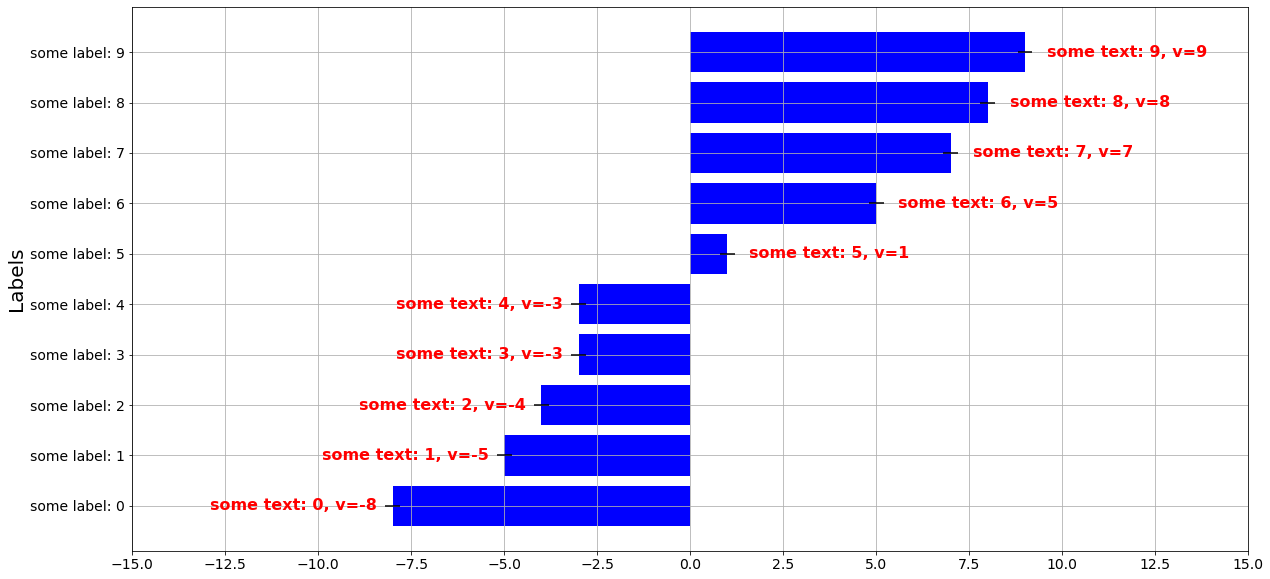

In [ ]:
figsize = (20, 10)

def plot_horizontal_bar_my(bars_length_0, labels_0, yticks_labels_0, figsize_0):
  #
  fig = plt.figure(figsize=figsize_0)
  p1 = plt.barh(np.arange(0, 10,1), width=bars_length_0, height=0.8,\
                left=0, color='b', align='center', tick_label=yticks_labels_0, \
                xerr=0.2) 
  plt.ylabel('Labels', fontsize=20)
  plt.xticks(np.arange(-15,15+2.5, 2.5),fontsize=14)
  plt.yticks(np.arange(0, 10,1), yticks_labels_0, fontsize=14)
  i_count=-1
  for i, v in enumerate(bars_length_0):
    i_count=i_count+1
    if v<0:
      align_text='left'
      j=-1
    else:
      align_text='right'
      j=1
    plt.text(v +4.9*j, i -0, 'some text: '+str(i_count)+', v='+str(v), color='red', \
             fontweight='bold', fontsize=16, \
             verticalalignment='center', \
             horizontalalignment=align_text)
  plt.grid(True)
  return plt.show()
  
# вызываем функцию
plot_horizontal_bar_my(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [ ]:
# Сигнатура функции и пример вывода:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)

np.round(probabilities_in_time, 4)

array([[0.0958, 0.0246, 0.0819, ..., 0.1403, 0.1084, 0.0377],
       [0.0934, 0.1776, 0.0609, ..., 0.153 , 0.1501, 0.0971],
       [0.0951, 0.0534, 0.1132, ..., 0.1706, 0.1463, 0.105 ],
       ...,
       [0.1369, 0.1103, 0.042 , ..., 0.0422, 0.0246, 0.0737],
       [0.1361, 0.0929, 0.169 , ..., 0.0127, 0.0492, 0.126 ],
       [0.0642, 0.0769, 0.0901, ..., 0.0593, 0.0992, 0.1123]])

In [ ]:
for i_sort in range(len(dti)):
  probabilities_in_time[::,i_sort]=np.sort(probabilities_in_time[::,i_sort], axis=0)
np.round(probabilities_in_time, 4)

array([[0.0203, 0.0246, 0.042 , ..., 0.0127, 0.0246, 0.0377],
       [0.0483, 0.0534, 0.0586, ..., 0.0194, 0.0492, 0.0436],
       [0.0642, 0.054 , 0.0609, ..., 0.0422, 0.0512, 0.0737],
       ...,
       [0.1369, 0.1411, 0.1588, ..., 0.153 , 0.1463, 0.126 ],
       [0.1491, 0.1442, 0.1605, ..., 0.1706, 0.1501, 0.1539],
       [0.1609, 0.1776, 0.169 , ..., 0.175 , 0.1639, 0.1591]])

In [ ]:
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
probabilities_in_time

,0,1,2,3,4,5,6,7,8,9
2013-01-06,0.020324,0.048275,0.064209,0.093411,0.095061,0.095793,0.136064,0.136851,0.149136,0.160875
2013-01-20,0.024649,0.053404,0.054030,0.076898,0.092928,0.110283,0.124888,0.141110,0.144218,0.177591
2013-02-03,0.042044,0.058551,0.060875,0.065114,0.081922,0.090068,0.113191,0.158758,0.160462,0.169014
2013-02-17,0.025881,0.029269,0.076495,0.087018,0.092182,0.123206,0.125667,0.129222,0.153802,0.157258
2013-03-03,0.039334,0.058822,0.059982,0.060514,0.073861,0.095060,0.097930,0.161169,0.161191,0.192137
...,...,...,...,...,...,...,...,...,...,...
2020-11-01,0.009886,0.022799,0.036940,0.100166,0.105541,0.117114,0.117795,0.138348,0.166206,0.185206
2020-11-15,0.021228,0.026479,0.058402,0.077619,0.081055,0.090566,0.117054,0.121492,0.167072,0.239033
2020-11-29,0.012718,0.019421,0.042246,0.059342,0.101135,0.126172,0.140300,0.153004,0.170626,0.175036
2020-12-13,0.024649,0.049239,0.051164,0.095274,0.099164,0.108363,0.111776,0.146347,0.150123,0.163900


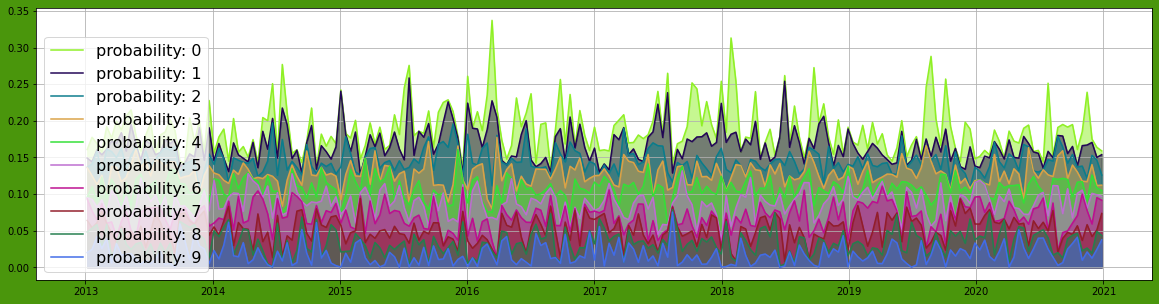

In [ ]:
figsize = (20, 5)
def plot_time_probabilities(probabilities_in_time_0, figsize_0):
  
  color_i=np.random.random((11,3))
  plt.figure(figsize=figsize_0, facecolor=color_i[10])
  labels_p = ['probability: {}'.format(i) for i in range(10)]

  for i_ts in range(10):
    ts=probabilities_in_time_0[9-i_ts]
    plt.plot(ts, color=color_i[9-i_ts])
    plt.fill_between(ts.index, ts, color=color_i[9-i_ts], alpha=0.5) # заполняем цветом от оси до кривой
  
  plt.legend(labels=labels_p ,loc='lower left', prop={'size':16})
  plt.grid(True)
  #plt.xlim('2014-01', '2014-10') # умный индекс
  return plt.show()

# вызываем функцию
plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [ ]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan

In [ ]:
intraday_ts_df = pd.DataFrame(intraday_ts, columns=['ts_Val'])
intraday_ts_df.insert(1, 'hour_ts', intraday_ts_df.index.hour)
intraday_ts_df.insert(1, 'date_ts', intraday_ts_df.index.date)
#intraday_ts_df
intraday_ts_df_1 = intraday_ts_df.copy()
#intraday_ts_df_1
#hour_ts_u = intraday_ts_df_1['hour_ts'].unique()
#hour_ts_u
df1 = intraday_ts_df_1.pivot_table(index="hour_ts",columns="date_ts",values='ts_Val',\
                                   aggfunc='sum' )#, fill_value=50)
#df1
df1[df1==0]=50
#df1

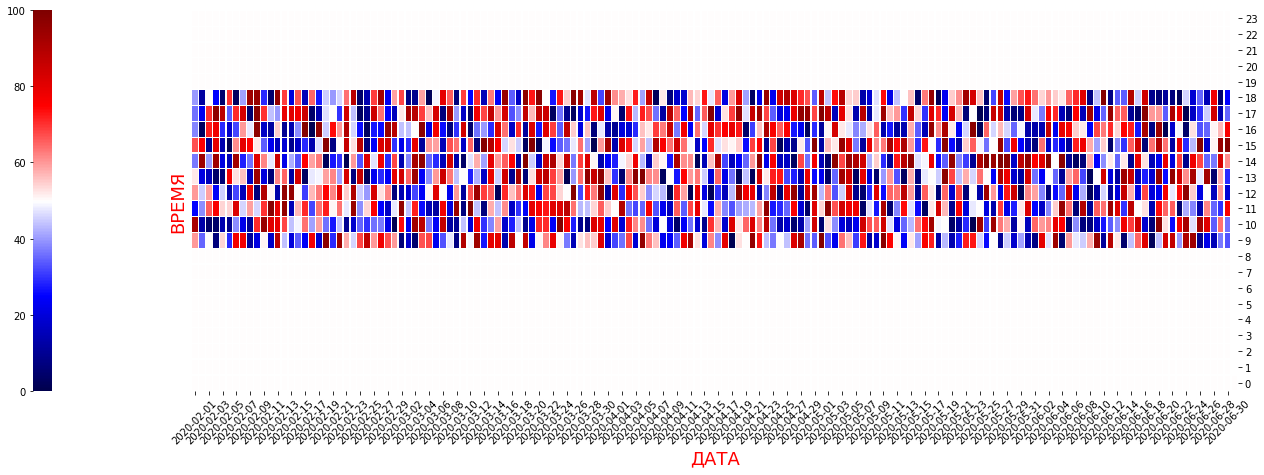

In [ ]:
def plot_intraday_ts(intraday_ts_0, figsize_0):
  plt.figure(figsize=figsize_0, )
  ax=sns.heatmap(intraday_ts_0, cmap='seismic', vmin=0, vmax=100, cbar=True,  cbar_kws = dict(use_gridspec=False,location="left"), linewidths=0.2, linecolor='white') # cbar_ax=0) #, ax=ax)
  ax.invert_yaxis()
  plt.yticks(fontsize=12, rotation =0)
  plt.ylabel('ВРЕМЯ', color='red', fontsize=18)
  plt.xticks(fontsize=10, rotation =45)
  plt.xlabel('ДАТА', color='red', fontsize=18)
  plt.tick_params('y', left =False, right = True,labelleft = False, labelright = True, labelrotation = 0)
  return plt.show()

# вызов функции
figsize = (25, 7)
plot_intraday_ts(df1, figsize)

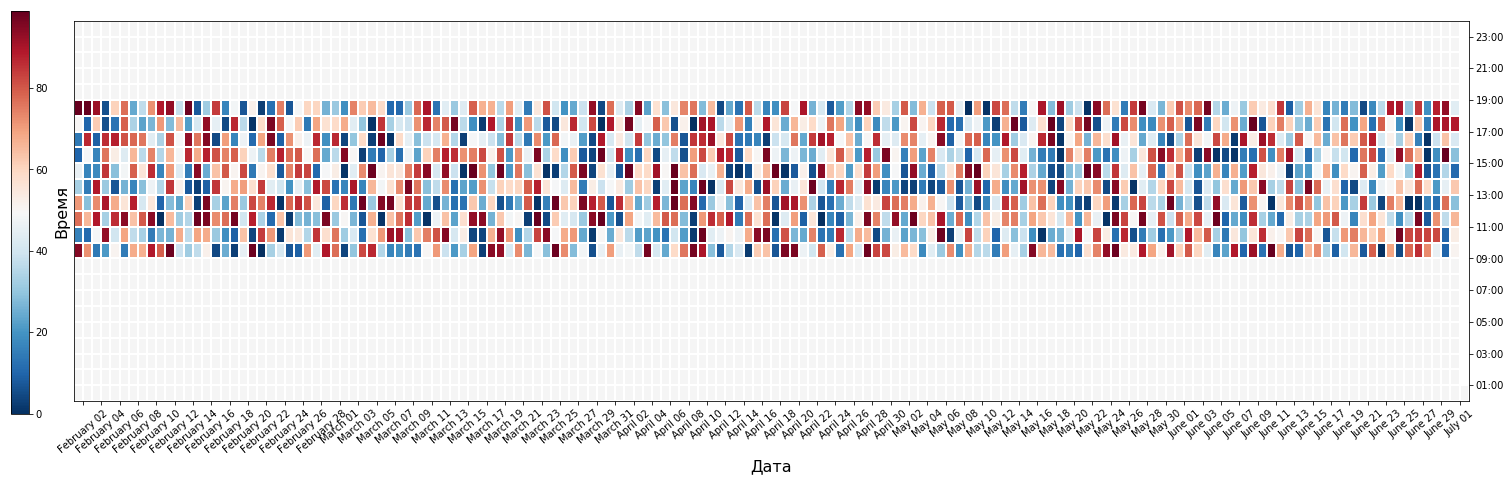

In [ ]:
# plot_intraday_ts(intraday_ts, figsize)